In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from pycaret.regression import *

<center><img src='../../images/features.png'/></center>

In [20]:
df_train_modify = pd.read_csv('../../csv/train_modifie_mickael.csv')
df_test_modify = pd.read_csv('../../csv/test_modifie_mickael.csv')

In [21]:
df_train = df_train_modify.drop(['Unnamed: 0', 'count'], axis=1)
df_test = df_test_modify.drop(['Unnamed: 0', 'count'], axis=1)

In [22]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

In [23]:
X_test = df_test.drop(['registered', 'casual'], axis=1)
y_test_registered = df_test['registered']
y_test_casual = df_test['casual']

# Pycaret avec cible : registered

In [63]:
df_pycaret = df_train.drop('casual', axis=1)

In [64]:
df_pycaret.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,months,hours,week_days,HI
0,4,0,0,1,9.84,14.395,81,0.0,13,1,0,6,9.84
1,4,0,0,1,9.02,13.635,80,0.0,32,1,1,6,9.02
2,4,0,0,1,9.02,13.635,80,0.0,27,1,2,6,9.02
3,4,0,0,1,9.84,14.395,75,0.0,10,1,3,6,9.84
4,4,0,0,1,9.84,14.395,75,0.0,1,1,4,6,9.84


In [65]:
s = setup(df_pycaret, target='registered')

,Description,Value
0,session_id,1366
1,Target,registered
2,Original Data,"(9039, 13)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,6
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(6327, 35)"


In [66]:
best_registered = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32.9166,2588.1063,50.7782,0.8685,0.4692,0.5260,0.1120
et,Extra Trees Regressor,32.8399,2822.9424,53.0297,0.8566,0.4220,0.4335,1.0590
rf,Random Forest Regressor,33.6368,2859.9055,53.3468,0.8548,0.4170,0.4229,1.1750
gbr,Gradient Boosting Regressor,42.3641,3913.6738,62.5094,0.8010,0.6548,0.9114,0.4410
dt,Decision Tree Regressor,42.9785,5120.4965,71.3967,0.7400,0.5397,0.5092,0.0530
ada,AdaBoost Regressor,66.1466,7133.9169,84.3596,0.6367,0.9983,2.3513,0.2860
knn,K Neighbors Regressor,69.8883,11066.3214,105.0666,0.4379,0.9415,1.9294,0.0820
br,Bayesian Ridge,83.2868,13776.9693,117.3042,0.2994,1.2010,3.2689,0.0330
ridge,Ridge Regression,83.3988,13780.3207,117.3162,0.2992,1.2010,3.2882,0.0170
lr,Linear Regression,83.3986,13780.4888,117.3168,0.2992,1.2010,3.2882,1.5570


In [67]:
predictions = predict_model(best_registered, data= df_pycaret)

<AxesSubplot:>

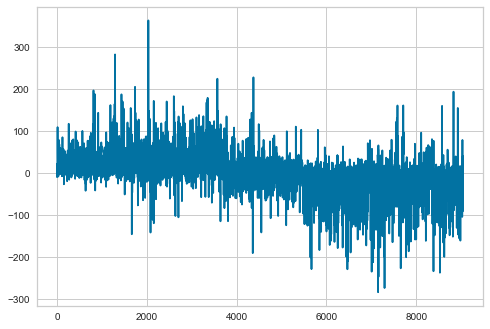

In [68]:
sns.lineplot(x=predictions.index, y = (predictions['Label'] - predictions['registered']))

[(0.0, 1000.0)]

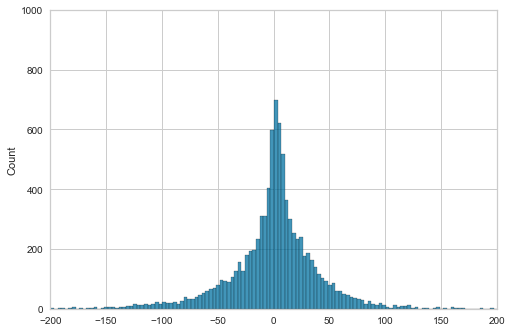

In [71]:
p = sns.histplot((predictions['Label'] - predictions['registered']), bins=200)
p.set(xlim=[-200,200])
p.set(ylim=[0,1000])

# Pycaret avec cible : casual

In [41]:
df_pycaret = df_train.drop('registered', axis=1)

In [42]:
df_pycaret.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,months,hours,week_days,HI
0,4,0,0,1,9.84,14.395,81,0.0,3,1,0,6,9.84
1,4,0,0,1,9.02,13.635,80,0.0,8,1,1,6,9.02
2,4,0,0,1,9.02,13.635,80,0.0,5,1,2,6,9.02
3,4,0,0,1,9.84,14.395,75,0.0,3,1,3,6,9.84
4,4,0,0,1,9.84,14.395,75,0.0,0,1,4,6,9.84


In [43]:
s = setup(df_pycaret, target='casual')

,Description,Value
0,session_id,2464
1,Target,casual
2,Original Data,"(9039, 13)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,6
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(6327, 35)"


In [44]:
best_casual = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.9153,229.4939,15.1260,0.9038,0.5435,0.5689,0.9410
lightgbm,Light Gradient Boosting Machine,9.3204,248.3708,15.7235,0.8960,0.5740,0.6090,0.0850
rf,Random Forest Regressor,9.3999,267.8703,16.3197,0.8879,0.5385,0.5802,1.1010
gbr,Gradient Boosting Regressor,12.5452,440.3734,20.9481,0.8160,0.7839,1.0289,0.4100
dt,Decision Tree Regressor,12.4235,509.9696,22.4943,0.7859,0.6896,0.7137,0.0400
knn,K Neighbors Regressor,18.2257,1045.0915,32.2784,0.5625,0.8391,1.0778,0.0630
ada,AdaBoost Regressor,29.1637,1145.3090,33.8256,0.5194,1.6387,4.8599,0.2770
ridge,Ridge Regression,23.7774,1208.2918,34.7160,0.4952,1.3614,3.0491,0.0170
br,Bayesian Ridge,23.7242,1208.2868,34.7157,0.4952,1.3592,3.0388,0.0190
lr,Linear Regression,23.7809,1208.3054,34.7162,0.4952,1.3615,3.0498,1.4900


In [45]:
predictions = predict_model(best_casual, data= df_pycaret)

<AxesSubplot:>

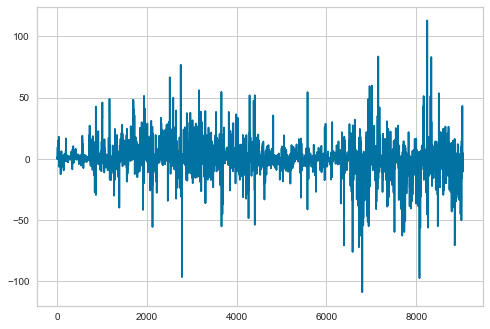

In [46]:
sns.lineplot(x=predictions.index, y = (predictions['Label'] - predictions['casual']))

[(0.0, 100.0)]

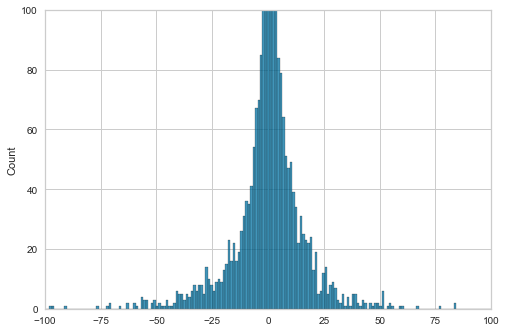

In [62]:
p = sns.histplot((predictions['Label'] - predictions['casual']), bins=200)
p.set(xlim=[-100,100])
p.set(ylim=[0,100])

In [72]:
create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.7598,15849.8523,125.8962,0.2778,1.1726,2.9352
1,84.7169,13863.8987,117.7451,0.3193,1.2304,3.2509
2,80.5339,12981.8733,113.9380,0.2794,1.1678,3.0464
3,82.9764,13263.0308,115.1652,0.3310,1.2183,3.4905
4,82.4589,13045.8901,114.2186,0.2875,1.1734,3.1784
5,81.1555,12764.6491,112.9807,0.3254,1.2071,3.6924
6,82.6023,13003.4185,114.0325,0.3057,1.1868,3.2949
7,87.5022,15337.6642,123.8453,0.2460,1.2533,3.3208
8,81.7850,13714.3653,117.1083,0.2936,1.2131,3.5822
9,81.4953,13980.2453,118.2381,0.3264,1.1874,3.0908


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)